In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


In [2]:
df = pd.read_excel('detail_transaksi.xlsx')

In [49]:
# Filter data dengan KOMISI = 'ST'
filter = df[(df['KOMISI']=='ST') & (df['PAYMENT_STATUS'] =='PAID')].copy()

In [4]:
#Histogram distribusi NILAI_REVENUE_PRODUCT per DEPARTMENT
plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

<Figure size 1200x700 with 0 Axes>

<Axes: xlabel='NILAI REVENUE PRODUCT', ylabel='Count'>

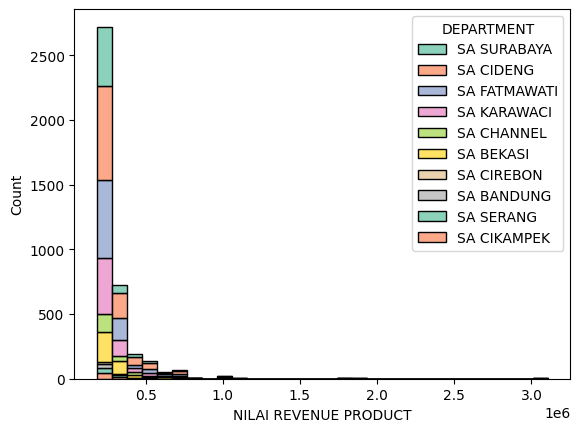

In [7]:
#Seaborn
sns.histplot(data=filter,
             x='NILAI REVENUE PRODUCT',
             hue='DEPARTMENT',
             multiple='stack',
             palette='Set2',
             bins=30,
             edgecolor='black')

<ipython-input-50-5d0848fd832f>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title ='Department')


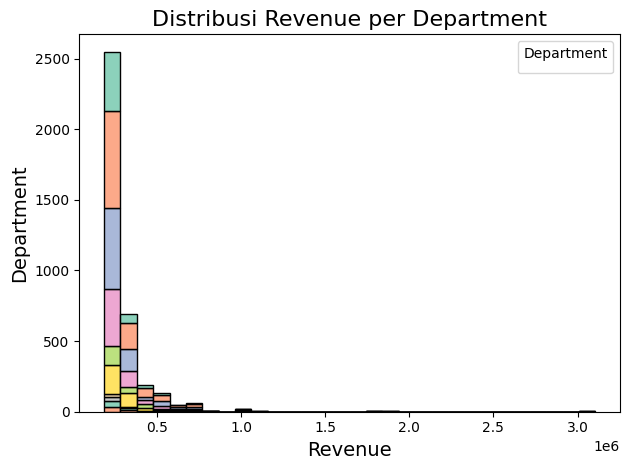

In [50]:
#Seaborn
sns.histplot(data=filter,
             x='NILAI REVENUE PRODUCT',
             hue='DEPARTMENT',
             multiple='stack',
             palette='Set2',
             bins=30,
             edgecolor='black')
plt.title('Distribusi Revenue per Department',fontsize = 16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Department', fontsize=14)
plt.legend(title ='Department')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
<ipython-input-22-1b5f67a5fb18>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title ='Department')


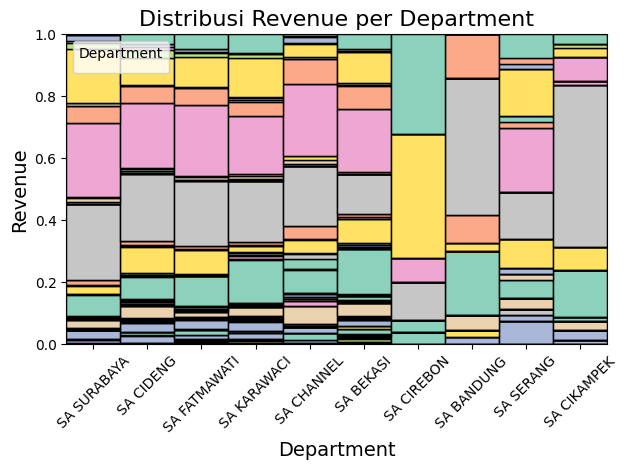

In [22]:
#Seaborn
sns.histplot(data=filter,
             x='DEPARTMENT',
             hue='NILAI REVENUE PRODUCT',
             multiple='fill',
             palette='Set2',
             bins=30,
             edgecolor='black')
plt.title('Distribusi Revenue per Department',fontsize = 16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title ='Department')
plt.tight_layout()
plt.show()

In [51]:
revenue = filter.groupby('DEPARTMENT')['NILAI REVENUE PRODUCT'].sum().reset_index()

<ipython-input-52-a54cf9066af4>:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title ='Department')


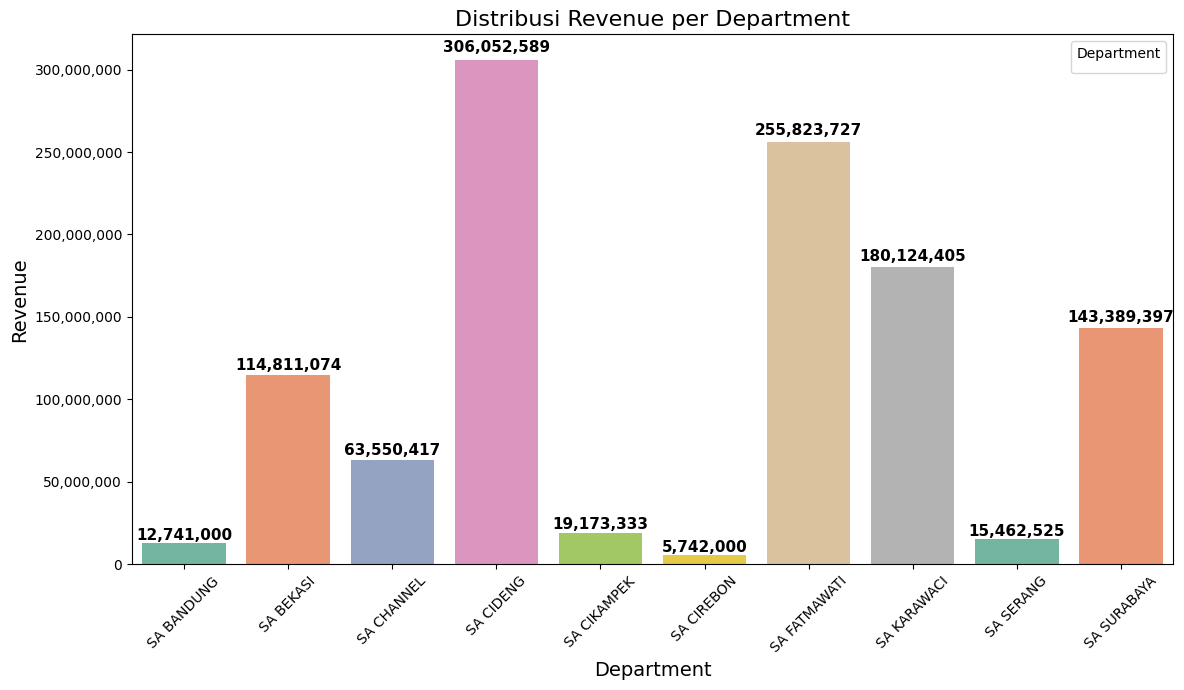

In [52]:
#Membuat barplot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=revenue,
                 x='DEPARTMENT',
                 y ='NILAI REVENUE PRODUCT',
                 hue='DEPARTMENT',
                 palette='Set2',
                 legend=False)

# fungsi format untuk menampilkan angka dengan koma sebagai pemisah ribuan
def format_millions(x, pos):
   # fromat angka dengan koma tanpa desimal
    return f'{int(x):,}'

    # Terapkan format angka pada sumbu Y
ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

    # Manambahkan angka disetiap bar
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, # horizontal position in the mid bar
        height + (0.01 * height),             # slightly vertical position above the bar
               f'{int(height):,}',            # number text with comma
               ha='center',                   # horizontal alignment center
               va='bottom',                   # vertical alignment below the text
               fontsize = 11,
               fontweight='bold')

plt.title('Distribusi Revenue per Department',fontsize = 16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title ='Department')
plt.tight_layout()
plt.show()
